In [149]:
import pandas as pd

In [150]:
df = pd.read_csv('/content/twitterdata.csv')
df

,Unnamed: 0.1,Unnamed: 0,tweet,label
0,0,0.0,"I`d have responded, if I were going",2.0
1,1,1.0,Sooo SAD I will miss you here in San Diego!!!,0.0
2,2,2.0,my boss is bullying me...,0.0
3,3,3.0,what interview! leave me alone,0.0
4,4,4.0,"Sons of ****, why couldn`t they put them on t...",0.0
...,...,...,...,...
84240,84240,56760.0,has been having lots of fun tonight just hangi...,1.0
84241,84241,56761.0,@PrincessLeLe dnt know much about them but rea...,1.0
84242,84242,56762.0,I watched Jim carreys &quot;Yes Man&quot; last...,1.0
84243,84243,56763.0,"@gamingseasons Nice, gefeliciteerd!",1.0


In [151]:
# Data Cleaning
df = df[['tweet', 'label']]
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df

,tweet,label
0,"I`d have responded, if I were going",2.0
1,Sooo SAD I will miss you here in San Diego!!!,0.0
2,my boss is bullying me...,0.0
3,what interview! leave me alone,0.0
4,"Sons of ****, why couldn`t they put them on t...",0.0
...,...,...
84239,Listening to Evanescence cause I'm cool,1.0
84240,has been having lots of fun tonight just hangi...,1.0
84241,@PrincessLeLe dnt know much about them but rea...,1.0
84242,I watched Jim carreys &quot;Yes Man&quot; last...,1.0


In [152]:
df.isnull().sum()

tweet    0
label    0
dtype: int64

In [153]:
df.isnull().any()

tweet    False
label    False
dtype: bool

In [154]:
df.shape

(84244, 2)

In [155]:
df['label'].value_counts()

0.0    57781
1.0    15346
2.0    11117
Name: label, dtype: int64

<Axes: >

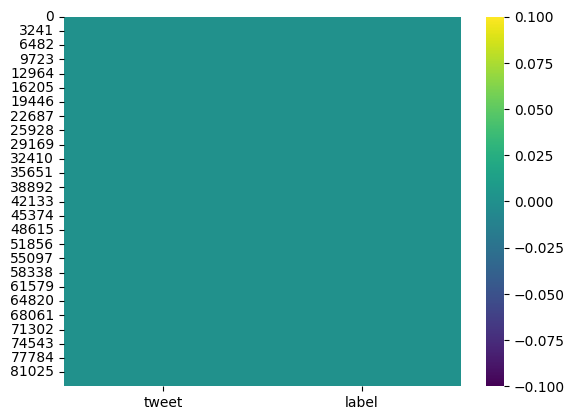

In [156]:
import seaborn as sns
sns.heatmap(df.isnull(), linecolor="red",cmap="viridis")



In [157]:
# Renaming columns names to make them more readable
df.rename({'tweet':'text','label':'sentiment'}, axis = 1, inplace = True)
df

,text,sentiment
0,"I`d have responded, if I were going",2.0
1,Sooo SAD I will miss you here in San Diego!!!,0.0
2,my boss is bullying me...,0.0
3,what interview! leave me alone,0.0
4,"Sons of ****, why couldn`t they put them on t...",0.0
...,...,...
84239,Listening to Evanescence cause I'm cool,1.0
84240,has been having lots of fun tonight just hangi...,1.0
84241,@PrincessLeLe dnt know much about them but rea...,1.0
84242,I watched Jim carreys &quot;Yes Man&quot; last...,1.0


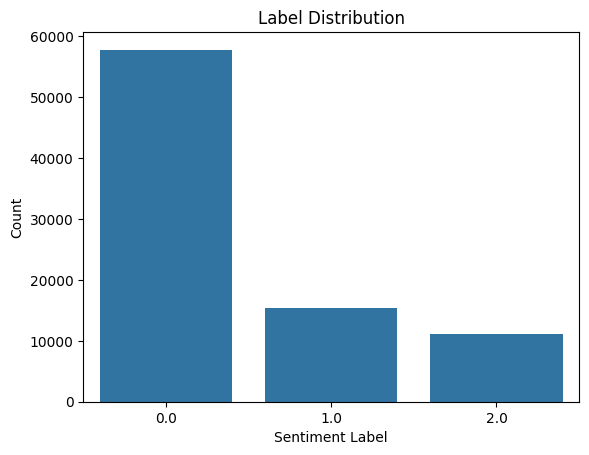

In [158]:
label_counts = df['sentiment'].value_counts()
import seaborn as sns
import matplotlib.pyplot as plt


# Create a bar chart using Seaborn
sns.barplot(x=label_counts.index, y=label_counts.values)

# Add labels and title
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Label Distribution')

# Show the plot
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


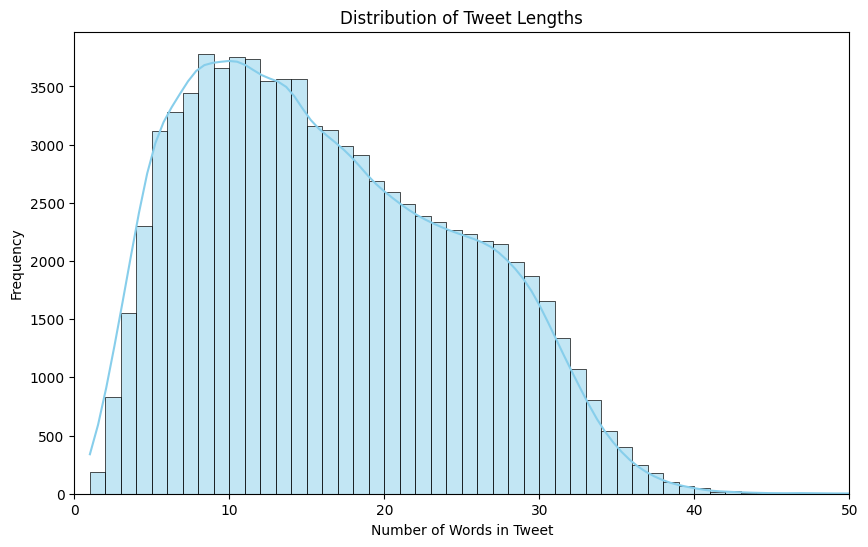

In [159]:
#Visualising the distribution of length of tweets
# Tokenize the tweets to count the number of words
import nltk
import string
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
df['initial_tweet_length'] = df['text'].apply(lambda tweet: len(word_tokenize(tweet)))

# Create a histogram of tweet lengths
plt.figure(figsize=(10, 6))
sns.histplot(df, x='initial_tweet_length', bins=range(1, 51), kde=True, color='skyblue')

# Customize the x-axis limits
plt.xlim(0, 50)

# Customize the plot
plt.xlabel("Number of Words in Tweet")
plt.ylabel("Frequency")
plt.title("Distribution of Tweet Lengths")

# Show the plot
plt.show()


In [ ]:
#Visualising number of different characteristic of tweets with respect to the total number of tweets
tweets_with_usernames = sum(df['text'].str.contains(r"@[\w]+", regex=True))
tweets_with_urls = sum(df['text'].str.contains(r"http\S+|www\S+|https\S+", regex=True))
tweets_with_special_char = sum(df['text'].str.contains(r"#", regex=True))


In [ ]:

# Calculate the total number of rows
total_rows = len(df)

In [ ]:
len(df)

In [ ]:
# Create a DataFrame to store the data
data_to_plot = pd.DataFrame({'Category': ['Tweets with usernames', 'Tweets with URLs', 'Tweets with Special Characters', 'Total Rows'],
                             'Count': [tweets_with_usernames, tweets_with_urls, tweets_with_special_char, total_rows]})

# Create a Seaborn bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = sns.barplot(x='Category', y='Count', data=data_to_plot)
# Add labels and title
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Tweet Characteristics")

# Add count above each bar graph
for bar, count in zip(ax.patches, data_to_plot['Count']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, count, ha='center')

# Show the plot
plt.tight_layout()
plt.show()



In [160]:
#Data Preprocessing
import re
import numpy as np
def remove_usernames(text):
    # Define a regex pattern to match usernames
    username_pattern = r'@[\w]+'

    # Use the sub() function to replace all matched usernames with an empty string
    cleaned_tweet = re.sub(username_pattern, '', text)

    return cleaned_tweet


In [161]:
#remover usernames
df['text'] = df['text'].apply(remove_usernames)
df

,text,sentiment,initial_tweet_length
0,"I`d have responded, if I were going",2.0,10
1,Sooo SAD I will miss you here in San Diego!!!,0.0,13
2,my boss is bullying me...,0.0,6
3,what interview! leave me alone,0.0,6
4,"Sons of ****, why couldn`t they put them on t...",0.0,20
...,...,...,...
84239,Listening to Evanescence cause I'm cool,1.0,7
84240,has been having lots of fun tonight just hangi...,1.0,10
84241,"dnt know much about them but read gd reviews,...",1.0,26
84242,I watched Jim carreys &quot;Yes Man&quot; last...,1.0,24


In [162]:
def remove_urls(text):
    # Use a regular expression to remove URLs
    return re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)


In [163]:
df['text'] = df['text'].apply(remove_urls)
df.tail(30)

,text,sentiment,initial_tweet_length
84214,"Going home, going to have dinner, going to wai...",1.0,14
84215,is down yo -- must be retribution from TWC,1.0,12
84216,YAY! Im real excited bout ur progress hopefu...,1.0,34
84217,the conbrainer store...could that be the titl...,1.0,17
84218,Good mornin all.,1.0,4
84219,love music -- drum &amp; bass: -- dubstep: -...,1.0,25
84220,i really love the love lab stage in rhythm hea...,1.0,13
84221,is looking forward to seeing Absent Elk's home...,1.0,16
84222,did you enjoy your sushi?,1.0,8
84223,"watching alot like love - aw i miss him,, ama...",1.0,13


In [164]:
#Removing Punctuations, Numbers, and Special Characters

df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ")
df['text'] = df['text'].str.replace("#", "")
df

<ipython-input-164-f337b6d0eb2a>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ")


,text,sentiment,initial_tweet_length
0,I d have responded if I were going,2.0,10
1,Sooo SAD I will miss you here in San Diego,0.0,13
2,my boss is bullying me,0.0,6
3,what interview leave me alone,0.0,6
4,Sons of why couldn t they put them on t...,0.0,20
...,...,...,...
84239,Listening to Evanescence cause I m cool,1.0,7
84240,has been having lots of fun tonight just hangi...,1.0,10
84241,dnt know much about them but read gd reviews ...,1.0,26
84242,I watched Jim carreys quot Yes Man quot last...,1.0,24


In [165]:
#Tokenization
df["text"] = df["text"].apply(lambda x: x.split())
df.head()

,text,sentiment,initial_tweet_length
0,"[I, d, have, responded, if, I, were, going]",2.0,10
1,"[Sooo, SAD, I, will, miss, you, here, in, San,...",0.0,13
2,"[my, boss, is, bullying, me]",0.0,6
3,"[what, interview, leave, me, alone]",0.0,6
4,"[Sons, of, why, couldn, t, they, put, them, on...",0.0,20


In [166]:
#Stemming and Lemmatization
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
df["text"] = df["text"].apply(lambda x: [stemmer.stem(i) for i in x])
df.head()

,text,sentiment,initial_tweet_length
0,"[i, d, have, respond, if, i, were, go]",2.0,10
1,"[sooo, sad, i, will, miss, you, here, in, san,...",0.0,13
2,"[my, boss, is, bulli, me]",0.0,6
3,"[what, interview, leav, me, alon]",0.0,6
4,"[son, of, whi, couldn, t, they, put, them, on,...",0.0,20


In [167]:
#Removing Stopwords
nltk.download('stopwords')


# Define a list of stopwords for text processing
stopwords = nltk.corpus.stopwords.words("english")

def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [168]:
df['text'] = df['text'].apply(process)
df.head()


,text,sentiment,initial_tweet_length
0,"[respond, go]",2.0,10
1,"[sooo, san, sad, diego, miss]",0.0,13
2,"[boss, bulli]",0.0,6
3,"[alon, leav, interview]",0.0,6
4,"[bought, whi, alreadi, put, son, releas]",0.0,20


In [169]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

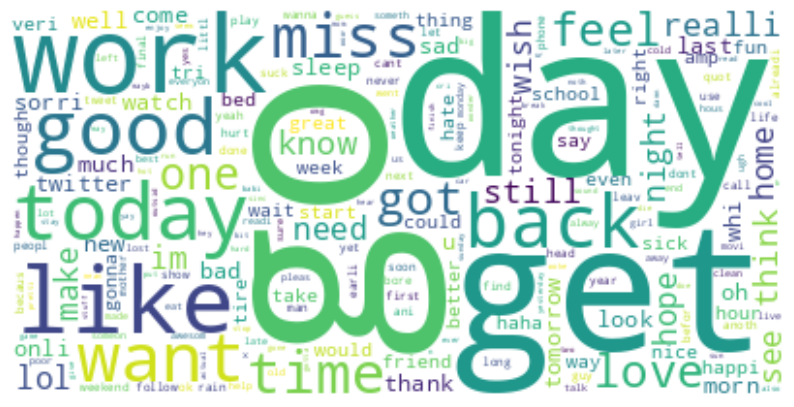

In [170]:
#data visulizing after preprocessing EDA
# get individual words
from collections import Counter

# Import libraries for natural language processing
from wordcloud import WordCloud

words = []
for line in df["text"]:
    words.extend(line)

# create a word frequency dictionary
wordfreq = Counter(words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color="white",
    max_words=500,
    stopwords=stopwords
    ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

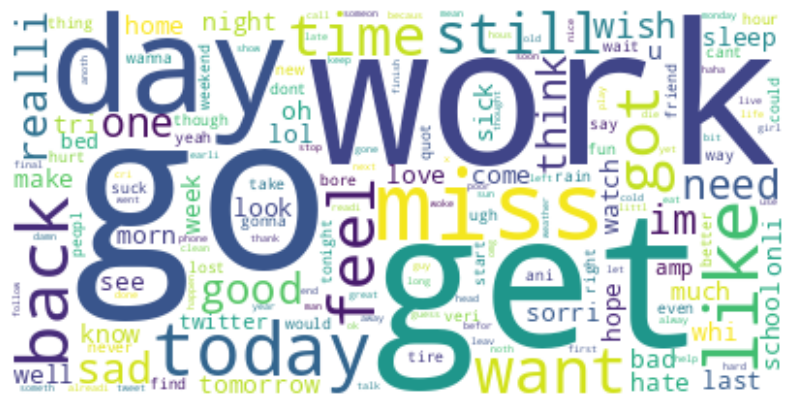

In [171]:
#Visualising most common words that are being labelled as 'Negative'
# get individual words
words = []
for line in df['text'][df['sentiment']==0.0]:
    words.extend(line)

# create a word frequency dictionary
wordfreq = Counter(words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color="white",
    max_words=500,
    stopwords=stopwords
    ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


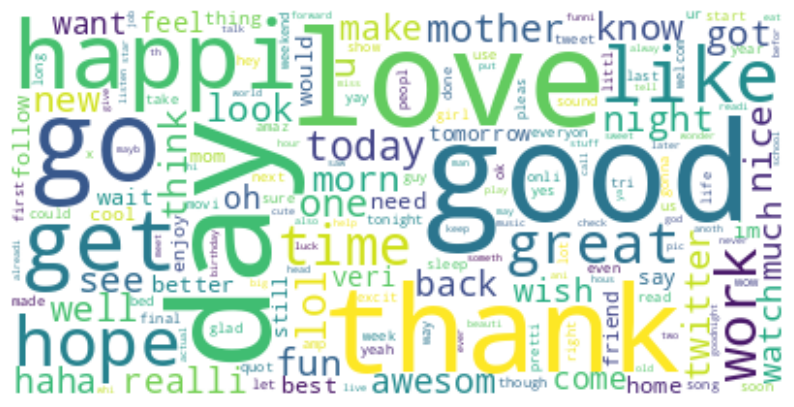

In [172]:
#Visualising most common words that are being labelled as 'Positive'
# get individual words
words = []
for line in df['text'][df['sentiment']==1.0]:
    words.extend(line)

# create a word frequency dictionary
wordfreq = Counter(words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color="white",
    max_words=500,
    stopwords=stopwords
    ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

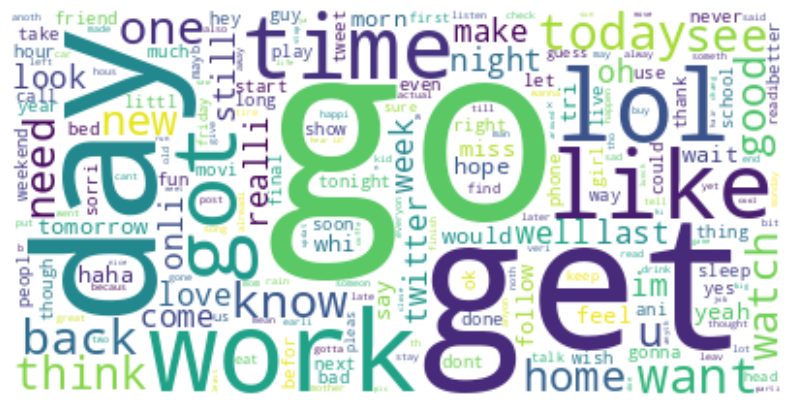

In [173]:
#Visualising most common words that are being labelled as 'Neutral'
# get individual words
words = []
for line in df['text'][df['sentiment']==2.0]:
    words.extend(line)

# create a word frequency dictionary
wordfreq = Counter(words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color="white",
    max_words=500,
    stopwords=stopwords
    ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [174]:
# joining individual tokens into a string to fit into vectorizer
df['text'] = df['text'].apply(lambda x: ' '.join(x))

In [187]:
from textblob import TextBlob
import pandas as pd

# Assuming df is your DataFrame and 'text' is the column you want to process
# df['text'] = df['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

# Apply word correction to the first 5 rows of the 'text' column
df['text'][:5] = df['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

# Display the modified DataFrame
print(df['text'][:5])


0                            respond go
1               soon san sad diego miss
2                             boss bull
3                 along leave interview
4    bought who already put son release
Name: text, dtype: object


<ipython-input-187-e2bcc0043de0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][:5] = df['text'][:5].apply(lambda x: str(TextBlob(x).correct()))


In [191]:
TextBlob(df['text'][5]).ngrams(2)
#N-grams are the combination of multiple words used together.


[WordList(['shameless', 'best']),
 WordList(['best', 'plug']),
 WordList(['plug', 'forum']),
 WordList(['forum', 'earth']),
 WordList(['earth', 'ranger'])]

In [192]:
#One hot encoding (Bag of words)
 #Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)


In [193]:
X_train

29515                          twilight near got work paus
55938            lil last night good woww hungov work time
33287    win wish well nice lose hors wouldv ah winner bet
28921                                peopl follow stop two
16759    provid made expect day script extranet convers...
                               ...                        
6265         mcflyy ha cool chanc finali came kill mwahaha
54886                    mini hope tonight golf rain pleas
76820                      camera dont luvo seen cord work
860                               rock urban challeng fire
15795                                        effort though
Name: text, Length: 67395, dtype: object

In [194]:
X_test

52544    caus back veri last hurt night must posit weir...
57321                                   havent naw confess
17588                                 sad mean make becaus
56639                     len today zoom happen drop thing
53196             hope glad tmr later didnt mayb latest im
                               ...                        
29834                         endur tire journey good luck
30576         drive feel well today shine parent chill sun
72117                                            room back
19209    togeth put pretti bought morn flower bouquet p...
14124        gym saw membership statement bank hold realiz
Name: text, Length: 16849, dtype: object

In [178]:
y_train

29515    0.0
55938    0.0
33287    0.0
28921    0.0
16759    2.0
        ... 
6265     2.0
54886    0.0
76820    0.0
860      2.0
15795    1.0
Name: sentiment, Length: 67395, dtype: float64

In [179]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
count_vect = CountVectorizer(stop_words='english')
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features = 10000, stop_words='english')

In [180]:
vectorizer

TfidfVectorizer(max_features=10000, ngram_range=(1, 3), stop_words='english')

In [181]:
X_train_tfidf = vectorizer.fit_transform(X_train)
print(X_train_tfidf.shape)

X_test_tfidf = vectorizer.transform(X_test)
print(X_test_tfidf.shape)


(67395, 10000)
(16849, 10000)
